[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1suuoPuw8EKSYxnH6Shnv_tHuT4Qs9nnq?usp=sharing)

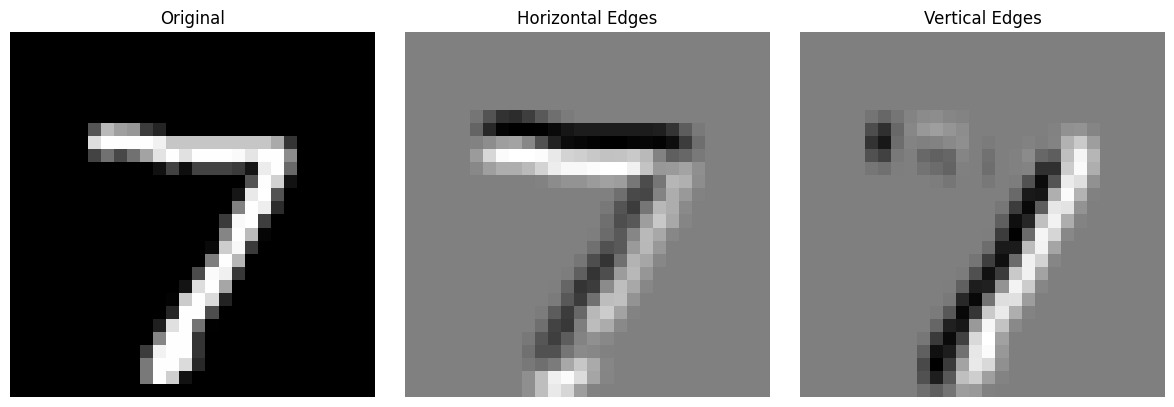

In [ ]:
#Хөндлөн ба босоо convolution Sobel kernel ашиглан хийсэн
import torch.nn.functional as F

# MNIST-ээс нэг зураг авах
sample_image, _ = test_dataset[0]
sample_tensor = sample_image.unsqueeze(0).to(device)  # (1, 1, 28, 28)

# Sobel kernels
sobel_horizontal = torch.tensor([[1, 2, 1],
                                 [0, 0, 0],
                                 [-1, -2, -1]], dtype=torch.float32).view(1, 1, 3, 3).to(device)

sobel_vertical = torch.tensor([[1, 0, -1],
                               [2, 0, -2],
                               [1, 0, -1]], dtype=torch.float32).view(1, 1, 3, 3).to(device)

# Convolution хийх
with torch.no_grad():
    horiz = F.conv2d(sample_tensor, sobel_horizontal, padding=1)
    vert = F.conv2d(sample_tensor, sobel_vertical, padding=1)

# Зураг дүрслэх
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(sample_image.squeeze().cpu(), cmap='gray')
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(horiz.squeeze().cpu(), cmap='gray')
axs[1].set_title('Horizontal Edges')
axs[1].axis('off')

axs[2].imshow(vert.squeeze().cpu(), cmap='gray')
axs[2].set_title('Vertical Edges')
axs[2].axis('off')

plt.tight_layout()
plt.show()